In [8]:
from src.data.letters_code import data_input
from src.data.data_input_mod import (
    letters_list,
    letters_data,
    generate_one_hot_encoding
)

from src.visualization.data_visualization import (
    data_input_visualization_letters,
    data_input_visualization
)
from src.model.new_NN import (
    random_weights_and_bias,
    NN_input_and_hidden_layer,
    NN_output_layer,
    softmax,
    back_propagation,
    update_weights,
    sigmoid,
    prediction,
    cross_entropy_loss
)

import numpy as np
import matplotlib.pyplot as plt

# Building a Simple Neural Network from Scratch

The goal of this project is to demonstrate, in the simplest and most accessible way possible,
how to build a basic neural network **from scratch**, without using advanced machine learning frameworks
like TensorFlow or PyTorch. Instead, we manually implement all the essential components, allowing a deeper
understanding of how neural networks work under the hood.

## Why Build a Neural Network from Scratch?

Modern libraries provide powerful tools, but they often abstract away the core concepts. By implementing
a neural network manually, we get to explore and understand:
- **How neurons and layers interact** through matrix operations.
- **How weights and biases are updated** using backpropagation.
- **How the network learns** via gradient descent and loss minimization.

## What Kind of Neural Network Are We Building?

This project focuses on a **simple feedforward neural network**, also known as a **fully connected network**.
Here's what this means:

- **Feedforward Architecture:** The network consists of layers where information moves in a single direction, from input to output, without cycles or loops.
- **Fully Connected Layers:** Every neuron in one layer is connected to every neuron in the next layer, allowing the network to learn complex patterns.
- **Manual Implementation:** All key components such as activation functions, loss calculations, weight updates, and backpropagation are manually coded.

---

## Key Principles and Approach

1. **Data Representation:**
   <br>We use **binary vectors** to encode letters. Each letter is represented as a 5x6 grid of pixels, flattened into a 30-element vector.

2. **Network Architecture:**
   - **Input Layer:** 30 neurons (each representing one pixel in the binary vector).
   - **Hidden Layer:** 15 neurons (arbitrarily chosen to balance learning capacity and simplicity).
   - **Output Layer:** 11 neurons (each corresponding to a letter class, with Softmax activation for classification).

   <br>

3. **Learning Process:**
   - **Forward Pass:** Input data passes through the network, generating predictions.
   - **Loss Calculation:** Measures how far predictions are from true labels using **cross-entropy loss**.
   - **Backpropagation:** Computes gradients for weight updates.
   - **Gradient Descent:** Adjusts weights to minimize the loss, improving predictions over time.

   <br>

4. **Edge Cases:**
   We also test how the network handles noisy or distorted input data, demonstrating its robustness and limitations.

This project serves as a **learning tool**, showcasing the fundamental principles of neural networks without the complexity of external libraries.


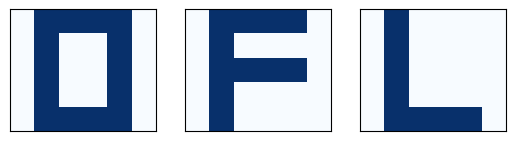

In [9]:
d = data_input()
encoding = letters_data(d)
data_input_visualization(encoding[3], encoding[5], encoding[0])

## Data Preparation and Initialization

In next section, we prepare the input data and initialize the weights of our neural network:

1. **Load the Data:**
   The `data_input()` function loads a dictionary where the **keys** are letter names (e.g., 'a', 'b', 'c') and the **values** are the corresponding **image encodings** as binary vectors. Each letter is represented by a 30-element vector (flattened 5x6 grid).

2. **Extracting Letter Names:**
   Using `letters_list(data_input)`, we retrieve a **list of letter names**, which serves as our class labels for the classification task.

3. **Convert to Feature Vectors:**
   The function `letters_data(data_input)` converts the image encodings to a **list of binary vectors** that can be used as input to the neural network.

4. **Generate One-Hot Encodings:**
   The `generate_one_hot_encoding(letters_list)` function creates **one-hot encoded labels** for our classification problem. This is essential for comparing the model's output with the expected results during training.

5. **Initialize Weights:**
   - **Input-to-Hidden Layer Weights:**
     The `random_weights_and_bias()` function is called to generate **random initial weights** and **biases** for the first layer of the neural network. These weights map **30 input features** to **15 hidden neurons**.
   - **Hidden-to-Output Layer Weights:**
     Another call to `random_weights_and_bias(x=15, y=11)` generates random weights and biases for the next layer. Here, **15 hidden neurons** are connected to **11 output neurons**, with each output neuron representing a specific letter class.

By completing these steps, we prepare all the necessary components to start the **training process** for our neural network.


In [10]:
data_input = data_input()  # Load the dictionary where keys are letter names and values are their image encodings

letters_list = letters_list(data_input)  # Retrieve the list of letter names

x = letters_data(data_input)  # Retrieve the image encodings (binary vectors) as a list

y_true = generate_one_hot_encoding(letters_list)  # Generate one-hot encodings for the letters' classes

random = random_weights_and_bias()  # Generate random initial weights for the input-to-hidden layers
w1 = random[0]
b1 = random[1]

random02 = random_weights_and_bias(x=15,
                                        y=11)  # Generate random initial weights for the hidden-to-output layers
w2 = random02[0]
b2 = random02[1]

## Training the Neural Network with Loss Tracking

In this section, we train our neural network using the **`training_with_loss`** function, which is an extended version of the original **`training`** function.

### **What Does This Function Do?**
1. **Forward Pass:**
   Computes the activations for both the hidden and output layers using **sigmoid** and **softmax** functions.

2. **Loss Calculation:**
   At each epoch, the **cross-entropy loss** is calculated and stored in the **`loss_history`** list for later visualization.

3. **Optional Output:**
   Prints the **loss** every 100 epochs to give a sense of how well the model is converging.

4. **Backpropagation:**
   Computes gradients and updates weights using **gradient descent** with the specified **learning rate** (`lr`).

5. **Return Values:**
   Returns the **trained weights and biases** (`w1`, `b1`, `w2`, `b2`) as well as the **loss history** (`loss_history`).

---

### **Visualizing the Loss Curve**

After training is complete, we visualize the **loss curve** over the epochs. This helps to:

- Understand how quickly the model **converges**.
- Identify if the model is **overfitting** or **underfitting**.
- Spot potential issues like a **stagnant loss**, which might indicate problems with the learning rate or architecture.

A **smooth, downward curve** indicates good training progress, while **oscillations** or a **flat line** might require further tuning of hyperparameters.


Starting training with loss tracking...

Epoch 100/1000, Loss: 1.3879
Epoch 200/1000, Loss: 0.3455
Epoch 300/1000, Loss: 0.1044
Epoch 400/1000, Loss: 0.0532
Epoch 500/1000, Loss: 0.0340
Epoch 600/1000, Loss: 0.0245
Epoch 700/1000, Loss: 0.0189
Epoch 800/1000, Loss: 0.0152
Epoch 900/1000, Loss: 0.0127
Epoch 1000/1000, Loss: 0.0109

Training completed!


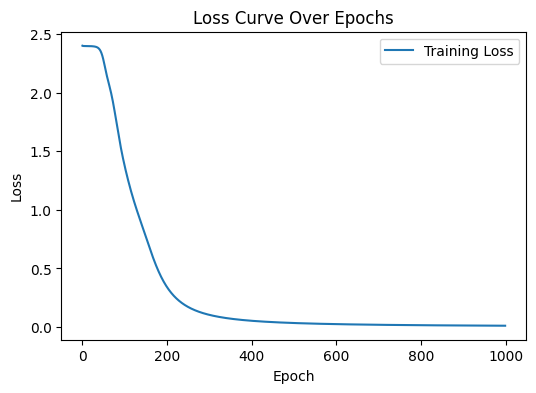

In [11]:
def training_with_loss(X, w1, b1, w2, b2, y_true, epochs=1000, lr=0.1):
    """
    Identical to 'training', but also returns a list of losses for plotting.
    """
    loss_history = []
    for epoch in range(epochs):
        # Forward pass
        z1 = NN_input_and_hidden_layer(X, w1, b1)
        a1 = sigmoid(z1)
        z2 = NN_output_layer(a1, w2, b2)
        a2 = softmax(z2)

        # Calculate loss
        loss = cross_entropy_loss(y_true, a2)
        loss_history.append(loss)

        # Optional: print loss every 100 epochs
        if (epoch + 1) % 100 == 0:
            print(f"Epoch {epoch+1}/{epochs}, Loss: {loss:.4f}")

        # Backprop
        dL_dw1, dL_dw2, dL_db1, dL_db2 = back_propagation(X, y_true, a1, a2, w2, b2, w1, b1)
        w1, b1, w2, b2 = update_weights(w1, b1, w2, b2, dL_dw1, dL_db1, dL_dw2, dL_db2, lr)

    return w1, b1, w2, b2, loss_history

print("Starting training with loss tracking...\n")
w1, b1, w2, b2, loss_history = training_with_loss(x, w1, b1, w2, b2, y_true, epochs=1000, lr=0.1)
print("\nTraining completed!")

plt.figure(figsize=(6,4))
plt.plot(loss_history, label='Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss Curve Over Epochs')
plt.legend()
plt.show()

## Testing on clean data
Select the index of the letter to check, for example, 5 (**this is 'F'** if the order is [L, H, M, O, G, ...])

In [12]:
test_index = 5
print(f"Testing letter at index {test_index} -> '{letters_list[test_index]}'")

predicted_idx = prediction(x[test_index], w1, b1, w2, b2, letters_list)
print(f"Predicted letter index: {predicted_idx}, which is '{letters_list[predicted_idx]}'")

Testing letter at index 5 -> 'f'
Class probabilities: [3.13973395e-06 2.78868309e-06 2.28583226e-04 9.37059682e-09
 3.52678446e-06 9.85810429e-01 7.99362250e-03 2.71976040e-08
 2.33929801e-05 1.06301423e-04 5.82817918e-03]
Predicted class: 5
Letter f
Predicted letter index: 5, which is 'f'


## Visualize
On the left is the **real letter**, on the right is **the predicted letter**

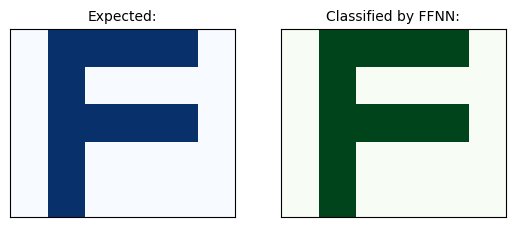

In [13]:
data_input_visualization_letters(x[test_index], x[predicted_idx])

## Edge Cases
Adds **random noise** to a binary letter vector by **flipping bits**

Class probabilities: [2.79325173e-04 7.96193744e-05 1.68691338e-03 2.50448841e-07
 1.68701172e-04 9.50656509e-01 6.75902062e-03 5.44904237e-08
 1.19194048e-05 2.01022406e-04 4.01566642e-02]
Predicted class: 5
Letter f
Original letter index: 5 -> 'f'
Noisy predicted letter index: 5, which is 'f'


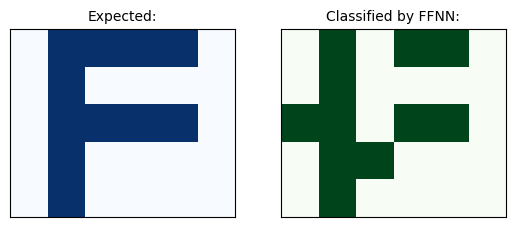

In [15]:
def add_noise_to_letter(letter_vector, noise_rate=0.2):
    noisy_vector = letter_vector.copy()
    random_vals = np.random.rand(len(noisy_vector))
    flip_mask = random_vals < noise_rate
    noisy_vector[flip_mask] = 1 - noisy_vector[flip_mask]
    return noisy_vector

test_index_noisy = 5
original_letter = x[test_index_noisy]

noisy_letter = add_noise_to_letter(original_letter, noise_rate=0.15)
predicted_idx_noisy = prediction(noisy_letter, w1, b1, w2, b2, letters_list)

print(f"Original letter index: {test_index_noisy} -> '{letters_list[test_index_noisy]}'")
print(f"Noisy predicted letter index: {predicted_idx_noisy}, which is '{letters_list[predicted_idx_noisy]}'")

data_input_visualization_letters(original_letter, noisy_letter)

## Analysis of the Noisy Edge Case

1. **Noise Level**: We used a 15% bit-flip rate (`noise_rate=0.15`).
   That means, on average, nearly one-sixth of the bits in the letter's vector were flipped.
2. **Result**:
   - If the predicted letter matches the original, the network is fairly robust to this level of noise.
   - If the prediction differs, it highlights that our simple network can't fully compensate for heavy input corruption.
3. **Possible Improvements**:
   - Increase the hidden layer size or add more layers.
   - Use a different activation (e.g., ReLU).
   - Train on a larger dataset or include noisy samples in training.
4. **Takeaways**:
   - Even a straightforward neural network can handle some moderate noise.
   - At higher noise levels, confusion increases, and classification can fail.

This concludes our minimal demonstration of edge cases regarding noisy input.


## **Diving Deeper into the Code**

If you want to explore the detailed **raw code** of this neural network:
- Check out the files of **modules** in the project:
  - **/data** How binary vectors and one-hot encodings are generated.
  - **/model** Step-by-step implementation of neural network layers, activation functions, and gradient descent.
  - **/visualization** Tools to visualize input data and classification results.

Each module is thoroughly documented with **detailed comments and annotations** to help you understand all the mathematical and computational processes involved.